In [230]:
import pandas as pd

# Suscriptores de TV por Suscripción

In [199]:
df_1 = pd.read_csv('./bases_datos/suscriptores_tv_p1.csv')
df_2 = pd.read_csv('./bases_datos/suscriptores_tv_p2.csv')
df_tv_sucrp = pd.concat([df_1,df_2])

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9532\1884655510.py:2: DtypeWarning: Columns (3,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv('./bases_datos/suscriptores_tv_p2.csv')


In [200]:
# Crear una columna con los datos temporales
df_tv_sucrp['datetime']=  df_tv_sucrp.apply(lambda row: f'{row.anno}/{str(row.mes + 3*(row.trimestre-1)).zfill(2)}', axis=1)

In [201]:
# Organizar el dataframe
# lista_columnas = list(df_tv_sucrp.columns)[3:-1]
# lista_columnas.insert(0,'datetime')
lista_columnas = ['datetime', 'id_operador', 'operador', 'id_departamento', 'departamento', 'id_municipio', 'municipio', 'suscriptores', 'entry_id']
df_tv_sucrp = df_tv_sucrp[lista_columnas]

In [202]:
# Eliminar entradas que no tienen datos por departamento
df_tv_sucrp = df_tv_sucrp.dropna(subset=['departamento', 'suscriptores'])
# Eliminar entradas con suscriptores = 0
df_tv_sucrp = df_tv_sucrp[df_tv_sucrp.suscriptores != 0]
df_tv_sucrp.reset_index(drop=True, inplace=True)

In [203]:
df_tv_sucrp

,datetime,id_operador,operador,id_departamento,departamento,id_municipio,municipio,suscriptores,entry_id
0,2010/01,800075305,INGENIERIA EN POTENCIA ELECTRICA Y COMUNICACIO...,54,NORTE DE SANTANDER,54498,OCAÑA,2021,1
1,2010/01,800132211,H V TELEVISION S.A.S.,25,CUNDINAMARCA,25754,SOACHA,18928,4
2,2010/01,800179562,LEGON TELECOMUNICACIONES S.A.S.,5,ANTIOQUIA,5154,CAUCASIA,369,5
3,2010/01,800193670,PROMOTORA DE TELEVISION. INTERNET Y COMUNICACI...,66,RISARALDA,66088,BELÉN DE UMBRÍA,1403,7
4,2010/01,800194191,INGELCOM Ingeniería Electrónica y de Telecomun...,54,NORTE DE SANTANDER,54001,CÚCUTA,7544,8
...,...,...,...,...,...,...,...,...,...
508856,2022/03,901453896,FIBERLINKNETWORKS S.A.S,5,ANTIOQUIA,5736,SEGOVIA,903,546737
508857,2022/03,901453896,FIBERLINKNETWORKS S.A.S,86,PUTUMAYO,86568,PUERTO ASÍS,135,546738
508858,2022/03,901460140,DIGI COMUNICACIONES TV. NET S.A.S.,13,BOLÍVAR,13650,SAN FERNANDO,49,546739
508859,2022/03,901491625,VITEL COMUNICACIONES NET SAS,68,SANTANDER,68276,FLORIDABLANCA,142,546740


In [205]:
datetime_list = df_tv_sucrp.datetime.unique()
dpto_list = df_tv_sucrp.departamento.unique()

In [206]:
df_tv_sucrp_depto_operador= df_tv_sucrp.groupby(['datetime', 'departamento', 'operador'])['suscriptores'].sum()
df_tv_sucrp_depto_operador.to_csv('./bases_datos/suscriptores_tv_dpto_operador.csv')
df_tv_sucrp_depto_operador = pd.read_csv('./bases_datos/suscriptores_tv_dpto_operador.csv')
df_tv_sucrp_depto_operador

,datetime,departamento,operador,suscriptores
0,2010/01,ANTIOQUIA,CABLE BELLO TELEVISION S.A.S.,35995
1,2010/01,ANTIOQUIA,LEGON TELECOMUNICACIONES S.A.S.,369
2,2010/01,ANTIOQUIA,MGN CABLEVISION LTDA.,1158
3,2010/01,ANTIOQUIA,VITEL LTDA (Antes CABLEVISION EL PALMAR LTDA),1379
4,2010/01,ARAUCA,CABLETAME S A S,691
...,...,...,...,...
34551,2022/03,VAUPÉS,COMUNICACION CELULAR S A COMCEL S A,241
34552,2022/03,VAUPÉS,DIRECTV COLOMBIA LTDA,1627
34553,2022/03,VICHADA,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,147
34554,2022/03,VICHADA,COMUNICACION CELULAR S A COMCEL S A,647


In [208]:
df_tv_sucrp_depto_operador = df_tv_sucrp_depto_operador.sort_values(by=['datetime', 'departamento','suscriptores'], ascending=[True, True, False])
df_tv_sucrp_depto_operador

,datetime,departamento,operador,suscriptores
0,2010/01,ANTIOQUIA,CABLE BELLO TELEVISION S.A.S.,35995
3,2010/01,ANTIOQUIA,VITEL LTDA (Antes CABLEVISION EL PALMAR LTDA),1379
2,2010/01,ANTIOQUIA,MGN CABLEVISION LTDA.,1158
1,2010/01,ANTIOQUIA,LEGON TELECOMUNICACIONES S.A.S.,369
6,2010/01,ARAUCA,T V SATELITE ARAUCA LTDA,1908
...,...,...,...,...
34551,2022/03,VAUPÉS,COMUNICACION CELULAR S A COMCEL S A,241
34550,2022/03,VAUPÉS,COLOMBIA TELECOMUNICACIONES S.A. E.S.P.,56
34555,2022/03,VICHADA,DIRECTV COLOMBIA LTDA,2926
34554,2022/03,VICHADA,COMUNICACION CELULAR S A COMCEL S A,647


In [209]:
df_tv_sucrp_dpto= df_tv_sucrp.groupby(['datetime', 'departamento'])['suscriptores'].sum()
df_tv_sucrp_dpto.to_csv('./bases_datos/suscriptores_tv_dpto.csv')

In [210]:
df_tv_sucrp_dpto = pd.read_csv('./bases_datos/suscriptores_tv_dpto.csv')
df_tv_sucrp_dpto = df_tv_sucrp_dpto.sort_values(by=['datetime', 'suscriptores'], ascending=[True, False])
df_tv_sucrp_dpto

,datetime,departamento,suscriptores
0,2010/01,ANTIOQUIA,38901
17,2010/01,VALLE DEL CAUCA,20495
9,2010/01,CUNDINAMARCA,18928
13,2010/01,NORTE DE SANTANDER,10132
7,2010/01,CAUCA,8969
...,...,...,...
4244,2022/03,AMAZONAS,5552
4276,2022/03,VICHADA,3720
4260,2022/03,GUAINÍA,2779
4275,2022/03,VAUPÉS,1924


In [225]:
new_index = ['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLÁNTICO', 'BOLÍVAR', 'BOYACÁ', 'CALDAS', 'CAQUETA', 'CASANARE', 'CAUCA', 'CESAR', 'CHOCÓ', 'CÓRDOBA',
             'CUNDINAMARCA', 'BOGOTÁ D.C.', 'GUAINÍA', 'GUAVIARE', 'HUILA', 'LA GUAJIRA', 'MAGDALENA', 'META', 'NARIÑO', 'NORTE DE SANTANDER', 'PUTUMAYO', 'QUINDÍO',
             'RISARALDA', 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE DEL CAUCA', 'VAUPÉS', 'VICHADA']

In [228]:
df = pd.DataFrame(columns=datetime_list)
list_temp = list()
for dpto_name in dpto_list:
    df_dpto_temp = df_tv_sucrp_dpto[df_tv_sucrp_dpto['departamento'] == dpto_name].drop(['departamento'], axis=1).rename(columns = {'suscriptores':dpto_name}).set_index(['datetime']).T
    df = pd.concat([df, df_dpto_temp])
df.sort_index(inplace=True)
df = df.fillna(0)
df = df.loc[new_index]
df

,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,...,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,2022/03
AMAZONAS,0,0,0,0,0,0,0,0,0,0,...,5124,5109,5115,5088,5068,5260,5423,5463,5153,5552
ANTIOQUIA,38901,38508,38194,37961,35256,35110,35180,33154,34954,32077,...,1138322,1138361,1143362,1149543,1153050,1166364,1169186,1194335,1201393,1208123
ARAUCA,3391,3393,2587,3436,3440,3403,3374,3375,2503,2487,...,15563,15247,15240,15086,14887,15114,15117,15395,15208,15381
ATLÁNTICO,7429,7430,7436,7432,7437,7453,7434,7434,7415,7102,...,305628,307346,307981,307588,309433,311092,310218,314300,316925,320475
BOLÍVAR,3056,3021,3001,2951,2927,2914,2868,2889,2896,2857,...,187997,187991,190053,191318,190546,193943,194263,197513,198275,198921
BOYACÁ,0,0,0,0,0,0,0,0,0,0,...,104724,106025,105933,106215,105818,105952,106971,105944,105901,105519
CALDAS,4252,4404,4382,4421,4294,4462,4562,4284,6139,4570,...,114953,116420,116621,117214,117741,118024,118654,119371,119778,119937
CAQUETA,1420,1420,1394,1383,1370,1355,1388,1444,1074,1449,...,18069,18023,17955,18001,17924,18096,18135,18284,18319,18395
CASANARE,0,0,0,0,0,0,0,0,0,0,...,35395,35522,35431,35364,35200,35891,36080,37756,37656,38002
CAUCA,8969,9073,9087,8964,8995,9031,9043,9197,9337,9286,...,77459,77681,77650,77361,77231,77607,76659,75872,75632,75823


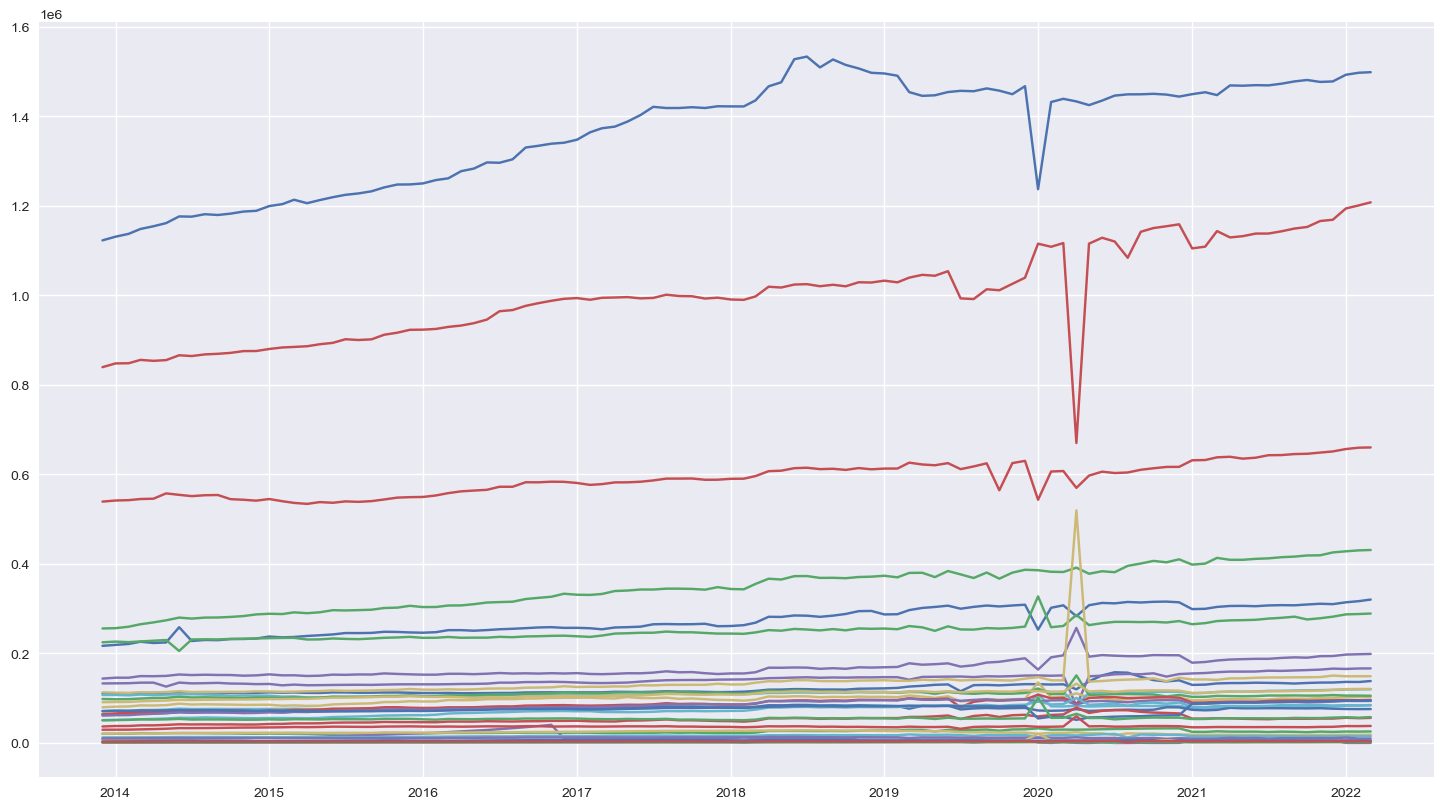

In [227]:
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('seaborn')

dates = [dt.datetime.strptime(date, "%Y/%m") for date in datetime_list]

plt.figure(figsize=(18,10), dpi=100)
for dpto in dpto_list:
    y_values = df.loc[dpto]
    plt.plot_date(dates[-100:], y_values[-100:], '-')

plt.show()

In [229]:
df.T.to_csv('././bases_datos/suscriptores_tv_dpto.v2.csv')
df

,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,...,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,2022/03
AMAZONAS,0,0,0,0,0,0,0,0,0,0,...,5124,5109,5115,5088,5068,5260,5423,5463,5153,5552
ANTIOQUIA,38901,38508,38194,37961,35256,35110,35180,33154,34954,32077,...,1138322,1138361,1143362,1149543,1153050,1166364,1169186,1194335,1201393,1208123
ARAUCA,3391,3393,2587,3436,3440,3403,3374,3375,2503,2487,...,15563,15247,15240,15086,14887,15114,15117,15395,15208,15381
ATLÁNTICO,7429,7430,7436,7432,7437,7453,7434,7434,7415,7102,...,305628,307346,307981,307588,309433,311092,310218,314300,316925,320475
BOLÍVAR,3056,3021,3001,2951,2927,2914,2868,2889,2896,2857,...,187997,187991,190053,191318,190546,193943,194263,197513,198275,198921
BOYACÁ,0,0,0,0,0,0,0,0,0,0,...,104724,106025,105933,106215,105818,105952,106971,105944,105901,105519
CALDAS,4252,4404,4382,4421,4294,4462,4562,4284,6139,4570,...,114953,116420,116621,117214,117741,118024,118654,119371,119778,119937
CAQUETA,1420,1420,1394,1383,1370,1355,1388,1444,1074,1449,...,18069,18023,17955,18001,17924,18096,18135,18284,18319,18395
CASANARE,0,0,0,0,0,0,0,0,0,0,...,35395,35522,35431,35364,35200,35891,36080,37756,37656,38002
CAUCA,8969,9073,9087,8964,8995,9031,9043,9197,9337,9286,...,77459,77681,77650,77361,77231,77607,76659,75872,75632,75823
